# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 70 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 30 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [278]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [36]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [37]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [136]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [39]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [40]:
def info_df(data):
    return pd.DataFrame(dict(dataFeatures=data.columns,
                             dataType=data.dtypes,
                             null=data.isna().sum(),
                             nullPct=round(data.isna().sum()/len(data)*100,2),
                             unique=data.nunique(),
                             uniqueSample=[list(data[i].drop_duplicates().sample(2)) for i in data.columns]
                            )).reset_index(drop=True)

tsa_features = info_df(tsa)
tsa_features

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2013020100808, 2004051452285]"
1,Date Received,object,70,0.14,3522,"[26-Jan-10, 2-Dec-02]"
2,Incident Date,object,570,1.12,10788,"[5/13/2007 0:00, 10/18/2012 0:00]"
3,Airport Code,object,2052,4.02,405,"[ALW, AOO]"
4,Airport Name,object,2052,4.02,419,"[Shreveport Regional, Mid Delta Regional]"
5,Airline Name,object,8555,16.75,243,"[Commercial Airways, Sun Country Airlines Inc ]"
6,Claim Type,object,1960,3.84,8,"[Property Damage, Motor Vehicle]"
7,Claim Site,object,190,0.37,6,"[-, Motor Vehicle]"
8,Item,object,1012,1.98,1854,[Cameras; Clothing; Computer & Accessories; Co...
9,Claim Amount,object,992,1.94,13248,"[$151.23 , $54.15 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object

In [236]:
tsa.replace({'-':np.nan},inplace=True)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [237]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [30]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 200-05-17 00:00:00

In [139]:
error_rows = []
for i, item in enumerate(tsa['Incident Date']):
    try:
        pd.to_datetime(item)
    except ValueError:
        error_rows.append(i)

In [140]:
# print(error_rows)
tsa.loc[error_rows,]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [146]:
error_dates = list(tsa.loc[error_rows,]['Incident Date'])
def replace_error(c):
    incident_date = c[0]
    received_yr = str(c[1].year)
    if incident_date in error_dates:
        incident_date = re.sub(r'\d{4}',received_yr,incident_date)
    return incident_date

In [238]:
tsa['Incident Date'] = tsa[['Incident Date','Date Received']].apply(replace_error,axis=1)

In [239]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [231]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [151]:
tsa.loc[error_rows,]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [240]:
tsa['Day Difference'] = (tsa['Date Received']-tsa['Incident Date']).dt.days

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

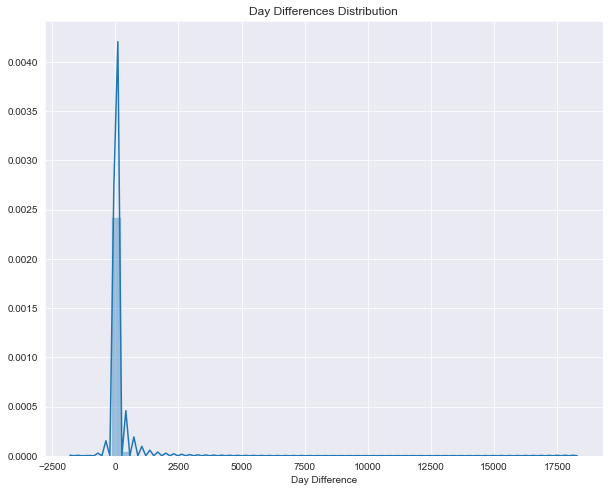

In [207]:
sns.set_style('darkgrid')
tsa_dropna1 = tsa.copy()['Day Difference'].dropna()
plt.figure(figsize=(10,8))
sns.distplot(tsa_dropna1)
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

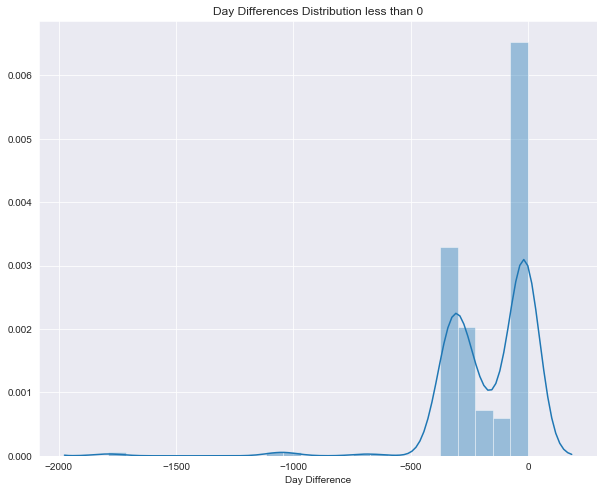

In [209]:
plt.figure(figsize=(10,8))
sns.distplot(tsa_dropna1[tsa_dropna1<0])
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution less than 1000')

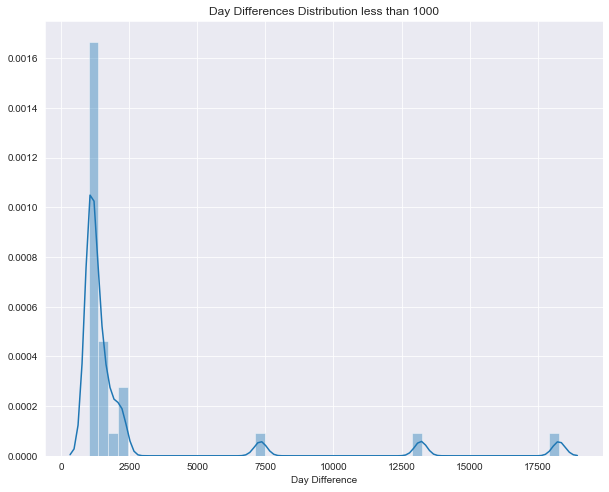

In [210]:
plt.figure(figsize=(10,8))
sns.distplot(tsa_dropna1[tsa_dropna1>1000])
plt.title('Day Differences Distribution less than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

Answer:

Based on the analysis below, some day differences with more than 1000 days are most likely caused due to the claim being denied and a little bit of impact due to the claim site is during bagage claim or at a checkpoint.

On the other hand, claims with day difference less than 0 seems to be affected by each categorical data. However, similar to the 1000 days difference claims, the most contrast data affecting it are status and claim site




In [288]:
tsa[tsa['Day Difference']>1000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference
5727,1217135M,2003-12-17,2000-01-01 00:00:00,NaN,NaN,Continental Airlines,Property Damage,Checked Baggage,Other,190.00,Settled,90.00,Settle,1446.0
6885,0212302M,2004-02-12,2001-02-01 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,65.00,Approved,65.00,Approve in Full,1106.0
7257,0305106M,2004-03-05,2000-01-01 00:00:00,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,40.00,Approved,40.00,Approve in Full,1525.0
9994,2004082661422,2004-07-19,2001-05-10 00:00:00,MCN,Middle Georgia Regional Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,3767.85,Closed as a contractor claim,0.00,NaN,1166.0
10932,2004100464331,2004-09-09,2001-09-01 00:00:00,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,30.00,Approved,30.00,Approve in Full,1104.0
16208,2005061086208,2005-06-01,2002-04-30 00:00:00,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,487.00,Settled,243.50,Settle,1128.0
18767,2005112396390,2005-11-10,2000-11-03 00:00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,Insufficient; one of the following items requi...,NaN,NaN,1833.0
20800,2006041004307,2006-03-30,2003-03-04 00:00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),199.99,Closed as a contractor claim,0.00,NaN,1122.0
20981,2006042505316,2006-04-13,2003-07-16 00:00:00,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,5015.00,Denied,0.00,Deny,1002.0
21876,2006062608536,2006-06-23,2003-06-07 00:00:00,COS,Colorado Springs Municipal,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),25.00,Denied,0.00,Deny,1112.0


In [317]:
tsa[tsa['Day Difference']>1000].corr()

,Claim Amount,Close Amount,Day Difference,Amount Differences
Claim Amount,1.000000,-0.110464,-0.083731,1.000000
Close Amount,-0.110464,1.000000,-0.170910,-0.110816
Day Difference,-0.083731,-0.170910,1.000000,-0.083667
Amount Differences,1.000000,-0.110816,-0.083667,1.000000


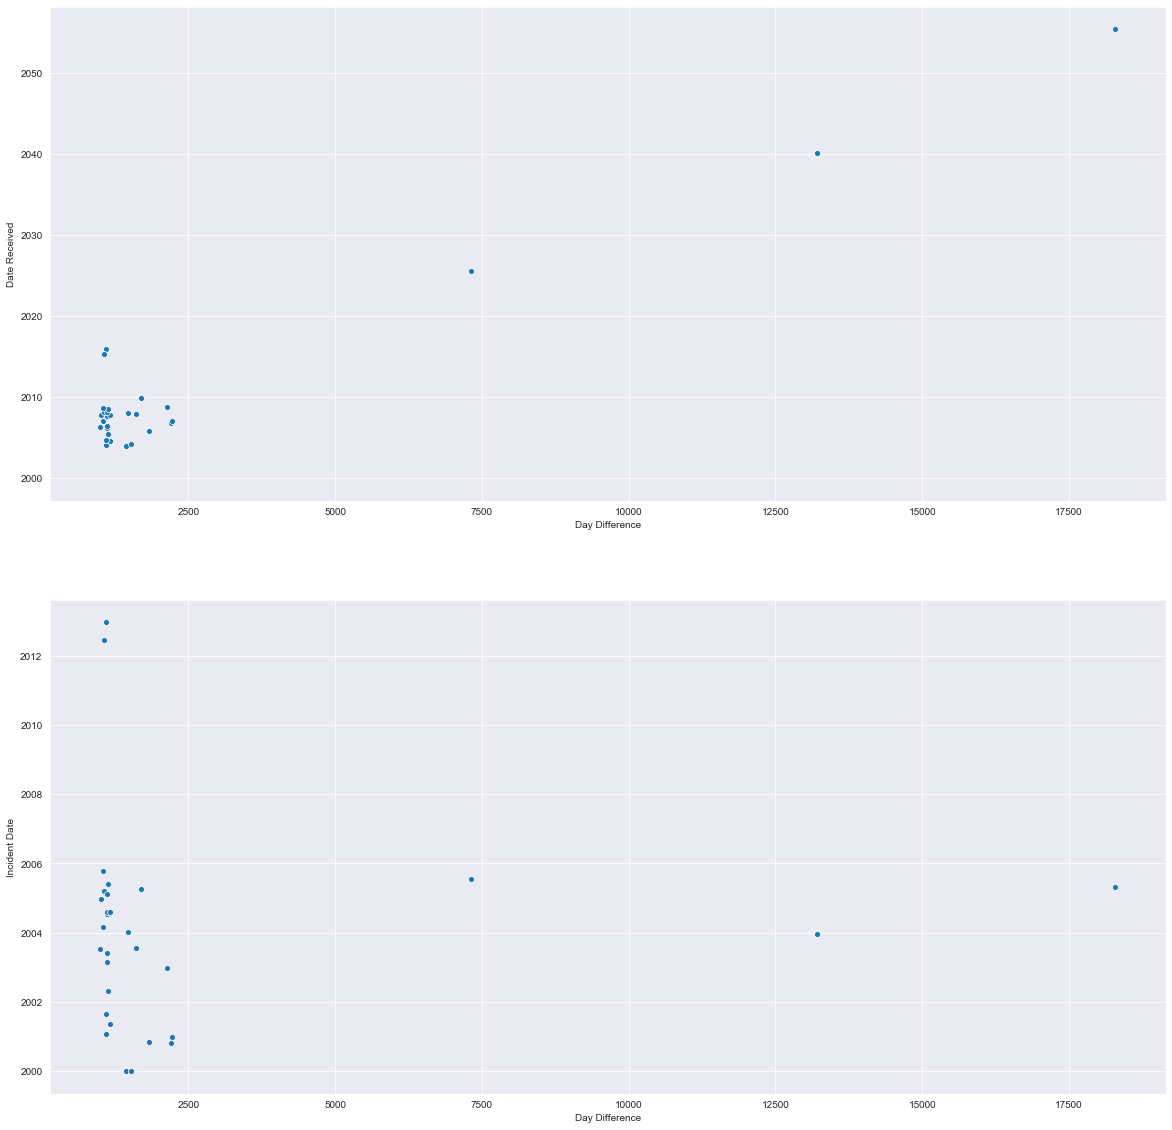

In [365]:
fig,ax = plt.subplots(2,1,figsize=(20,20))
sns.scatterplot('Day Difference','Date Received',data=tsa[tsa['Day Difference']>1000],ax=ax[0])
sns.scatterplot('Day Difference','Incident Date',data=tsa[tsa['Day Difference']>1000],ax=ax[1])

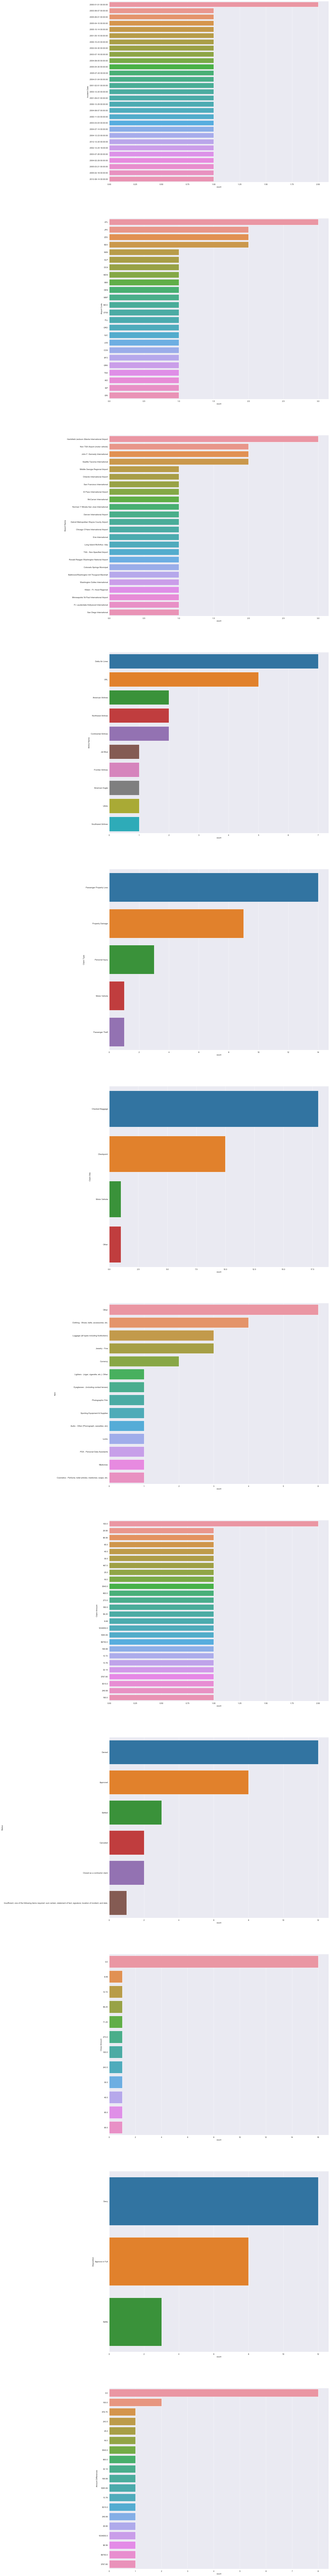

In [355]:
cols = [i for i in tsa.columns if tsa[tsa['Day Difference']>1000][i].nunique()<30]
fig,ax = plt.subplots(len(cols),1,figsize=(20,20*len(cols)))
# tsa[tsa['Day Difference']>1000]
for i,col in enumerate(cols):
    ser = tsa[tsa['Day Difference']>1000][col]
    sns.countplot(y=ser,ax=ax[i],order=ser.value_counts().index)

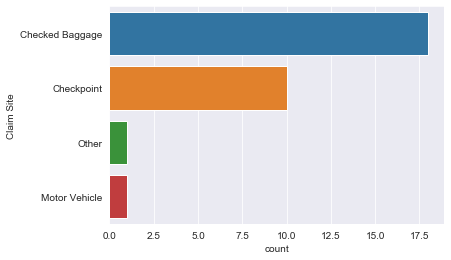

In [392]:
sns.countplot(y = tsa[tsa['Day Difference']>1000]['Claim Site'])

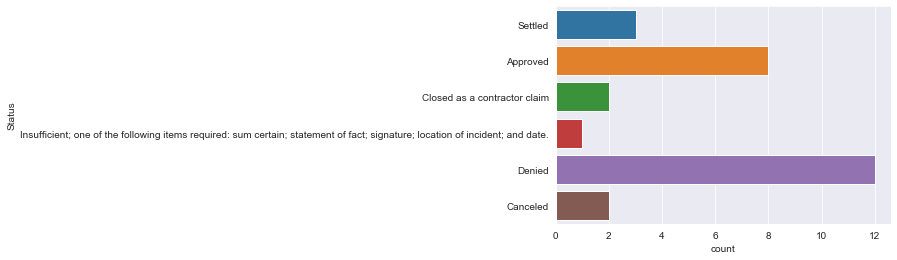

In [377]:
# len(tsa[tsa['Day Difference']>1000])
sns.countplot(y = tsa[tsa['Day Difference']>1000]['Status'])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

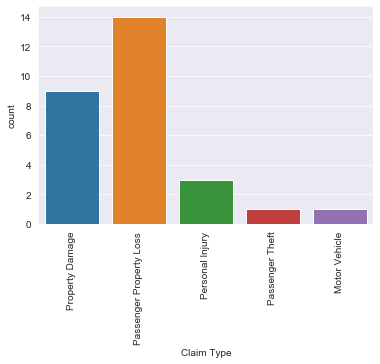

In [375]:
sns.countplot(tsa[tsa['Day Difference']>1000]['Claim Type'])
plt.xticks(rotation=90)

In [391]:
tsa[(tsa['Day Difference']>1000)].groupby(['Claim Type','Status']).count().sort_values('Claim Number',ascending=False)

Claim Number  \
Claim Type              Status                                                             
Passenger Property Loss Denied                                                         6   
Personal Injury         Denied                                                         3   
Property Damage         Approved                                                       3   
                        Denied                                                         3   
Passenger Property Loss Approved                                                       2   
                        Canceled                                                       2   
                        Settled                                                        2   
                        Closed as a contractor claim                                   1   
                        Insufficient; one of the following items requir...             1   
Passenger Theft         Approved                                                       1   
Property Damage         Closed as a contractor claim                                   1   
                        Settled                                                        1   

                                                                            Date Received  \
Claim Type              Status                                                              
Passenger Property Loss Denied                                                          6   
Personal Injury         Denied                                                          3   
Property Damage         Approved                                                        3   
                        Denied                                                          3   
Passenger Property Loss Approved                                                        2   
                        Canceled                                                        2   
                        Settled                                                         2   
                        Closed as a contractor claim                                    1   
                        Insufficient; one of the following items requir...              1   
Passenger Theft         Approved                                                        1   
Property Damage         Closed as a contractor claim                                    1   
                        Settled                                                         1   

                                                                            Incident Date  \
Claim Type              Status                                                              
Passenger Property Loss Denied                                                          6   
Personal Injury         Denied                                                          3   
Property Damage         Approved                                                        3   
                        Denied                                                          3   
Passenger Property Loss Approved                                                        2   
                        Canceled                                                        2   
                        Settled                                                         2   
                        Closed as a contractor claim                                    1   
                        Insufficient; one of the following items requir...              1   
Passenger Theft         Approved                                                        1   
Property Damage         Closed as a contractor claim                                    1   
                        Settled                                                         1   

                                                                            Airport Code  \
Claim Type              Status                                                           

In [390]:
tsa[(tsa['Day Difference']>1000)].groupby(['Status','Claim Type']).count().sort_values('Claim Number',ascending=False)

Claim Number  \
Status                                             Claim Type                              
Denied                                             Passenger Property Loss             6   
Approved                                           Property Damage                     3   
Denied                                             Personal Injury                     3   
                                                   Property Damage                     3   
Approved                                           Passenger Property Loss             2   
Canceled                                           Passenger Property Loss             2   
Settled                                            Passenger Property Loss             2   
Approved                                           Passenger Theft                     1   
Closed as a contractor claim                       Passenger Property Loss             1   
                                                   Property Damage                     1   
Insufficient; one of the following items requir... Passenger Property Loss             1   
Settled                                            Property Damage                     1   

                                                                            Date Received  \
Status                                             Claim Type                               
Denied                                             Passenger Property Loss              6   
Approved                                           Property Damage                      3   
Denied                                             Personal Injury                      3   
                                                   Property Damage                      3   
Approved                                           Passenger Property Loss              2   
Canceled                                           Passenger Property Loss              2   
Settled                                            Passenger Property Loss              2   
Approved                                           Passenger Theft                      1   
Closed as a contractor claim                       Passenger Property Loss              1   
                                                   Property Damage                      1   
Insufficient; one of the following items requir... Passenger Property Loss              1   
Settled                                            Property Damage                      1   

                                                                            Incident Date  \
Status                                             Claim Type                               
Denied                                             Passenger Property Loss              6   
Approved                                           Property Damage                      3   
Denied                                             Personal Injury                      3   
                                                   Property Damage                      3   
Approved                                           Passenger Property Loss              2   
Canceled                                           Passenger Property Loss              2   
Settled                                            Passenger Property Loss              2   
Approved                                           Passenger Theft                      1   
Closed as a contractor claim                       Passenger Property Loss              1   
                                                   Property Damage                      1   
Insufficient; one of the following items requir... Passenger Property Loss              1   
Settled                                            Property Damage                      1   

                                                                            Airport Code  \
Status                                             Claim Type                            

In [393]:
tsa[(tsa['Day Difference']>1000)].groupby(['Status','Claim Site']).count().sort_values('Claim Number',ascending=False)

Claim Number  \
Status                                             Claim Site                      
Denied                                             Checked Baggage             7   
                                                   Checkpoint                  5   
Approved                                           Checked Baggage             4   
                                                   Checkpoint                  4   
Settled                                            Checked Baggage             3   
Closed as a contractor claim                       Checked Baggage             2   
Canceled                                           Checked Baggage             1   
                                                   Other                       1   
Insufficient; one of the following items requir... Checkpoint                  1   

                                                                    Date Received  \
Status                                             Claim Site                       
Denied                                             Checked Baggage              7   
                                                   Checkpoint                   5   
Approved                                           Checked Baggage              4   
                                                   Checkpoint                   4   
Settled                                            Checked Baggage              3   
Closed as a contractor claim                       Checked Baggage              2   
Canceled                                           Checked Baggage              1   
                                                   Other                        1   
Insufficient; one of the following items requir... Checkpoint                   1   

                                                                    Incident Date  \
Status                                             Claim Site                       
Denied                                             Checked Baggage              7   
                                                   Checkpoint                   5   
Approved                                           Checked Baggage              4   
                                                   Checkpoint                   4   
Settled                                            Checked Baggage              3   
Closed as a contractor claim                       Checked Baggage              2   
Canceled                                           Checked Baggage              1   
                                                   Other                        1   
Insufficient; one of the following items requir... Checkpoint                   1   

                                                                    Airport Code  \
Status                                             Claim Site                      
Denied                                             Checked Baggage             7   
                                                   Checkpoint                  5   
Approved                                           Checked Baggage             4   
                                                   Checkpoint                  4   
Settled                                            Checked Baggage             2   
Closed as a contractor claim                       Checked Baggage             2   
Canceled                                           Checked Baggage             1   
                                                   Other                       1   
Insufficient; one of the following items requir... Checkpoint                  1   

                                                                    Airport Name  \
Status                                             Claim Site                      
Denied                                             Checked Baggage             7   
                                                   Checkpoint                  5   
Approved  

In [313]:
tsa[tsa['Day Difference']>0]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
5,2004050550501,2002-09-11,2002-08-05,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Passenger Property Loss,Checkpoint,Other,1200.00,Denied,NaN,Deny,37.0,NaN
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.00,Approve in Full,35.0,0.00
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,171.99,Settle,44.0,3.01
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,150.00,Denied,0.00,Deny,39.0,150.00
9,21021,2002-09-24,2002-08-31,PHL,Philadelphia International Airport,Delta Air Lines,Personal Injury,Other,Eyeglasses - (including contact lenses),50000.00,In litigation,NaN,NaN,24.0,NaN
10,0616631L,2002-09-25,2002-08-15,MCO,Orlando International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),26.00,Approved,26.00,Approve in Full,41.0,0.00


In [315]:
tsa[tsa['Day Difference']<0].corr()

,Claim Amount,Close Amount,Day Difference,Amount Differences
Claim Amount,1.000000,0.105665,0.026905,0.988803
Close Amount,0.105665,1.000000,0.066756,-0.043910
Day Difference,0.026905,0.066756,1.000000,0.027265
Amount Differences,0.988803,-0.043910,0.027265,1.000000


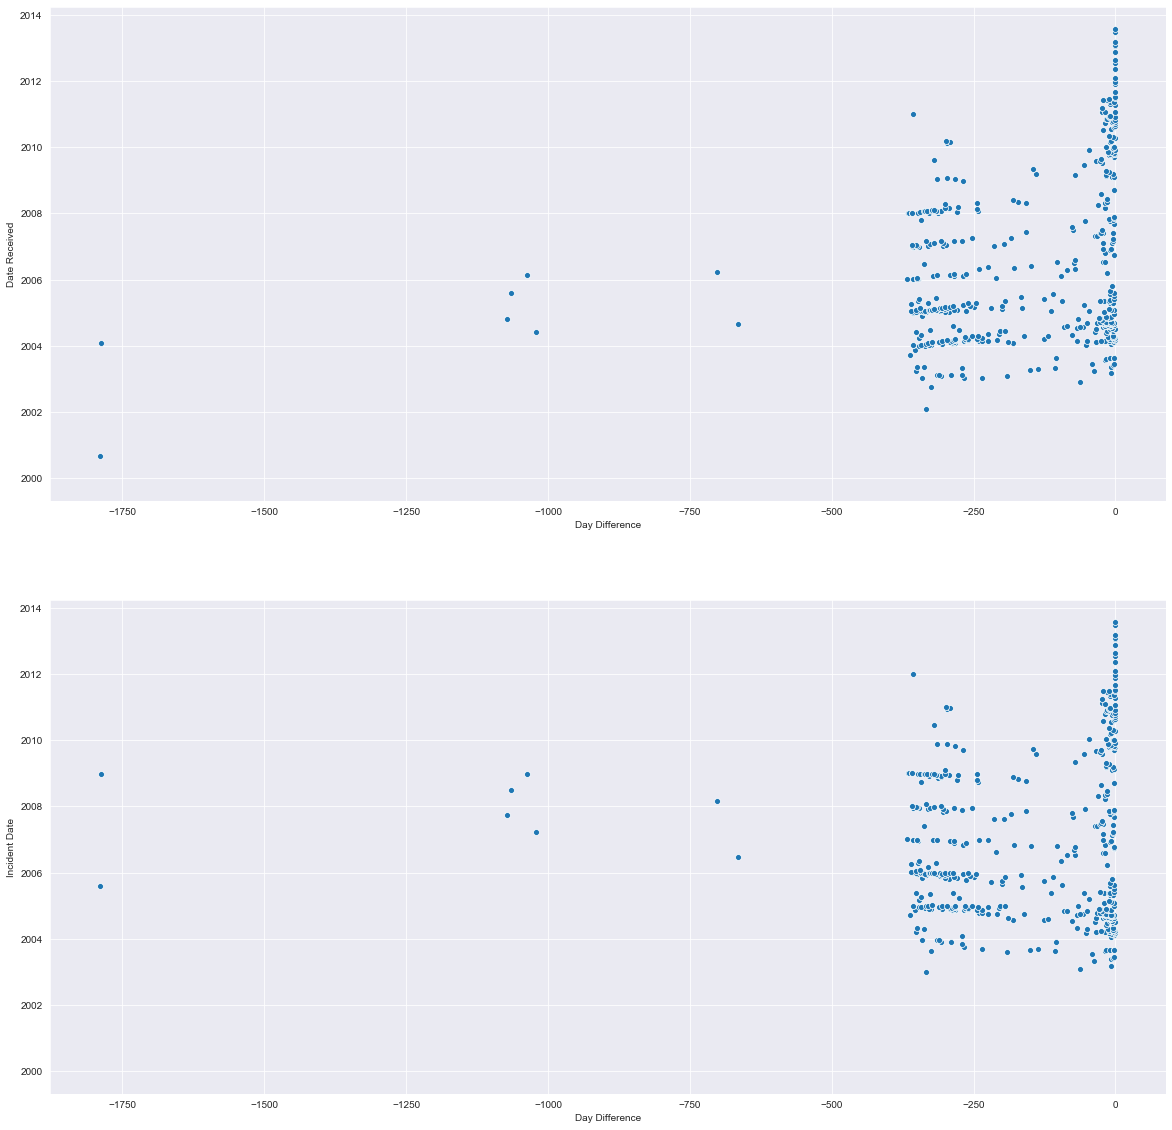

In [364]:
fig,ax = plt.subplots(2,1,figsize=(20,20))
sns.scatterplot('Day Difference','Date Received',data=tsa[tsa['Day Difference']<0],ax=ax[0])
sns.scatterplot('Day Difference','Incident Date',data=tsa[tsa['Day Difference']<0],ax=ax[1])

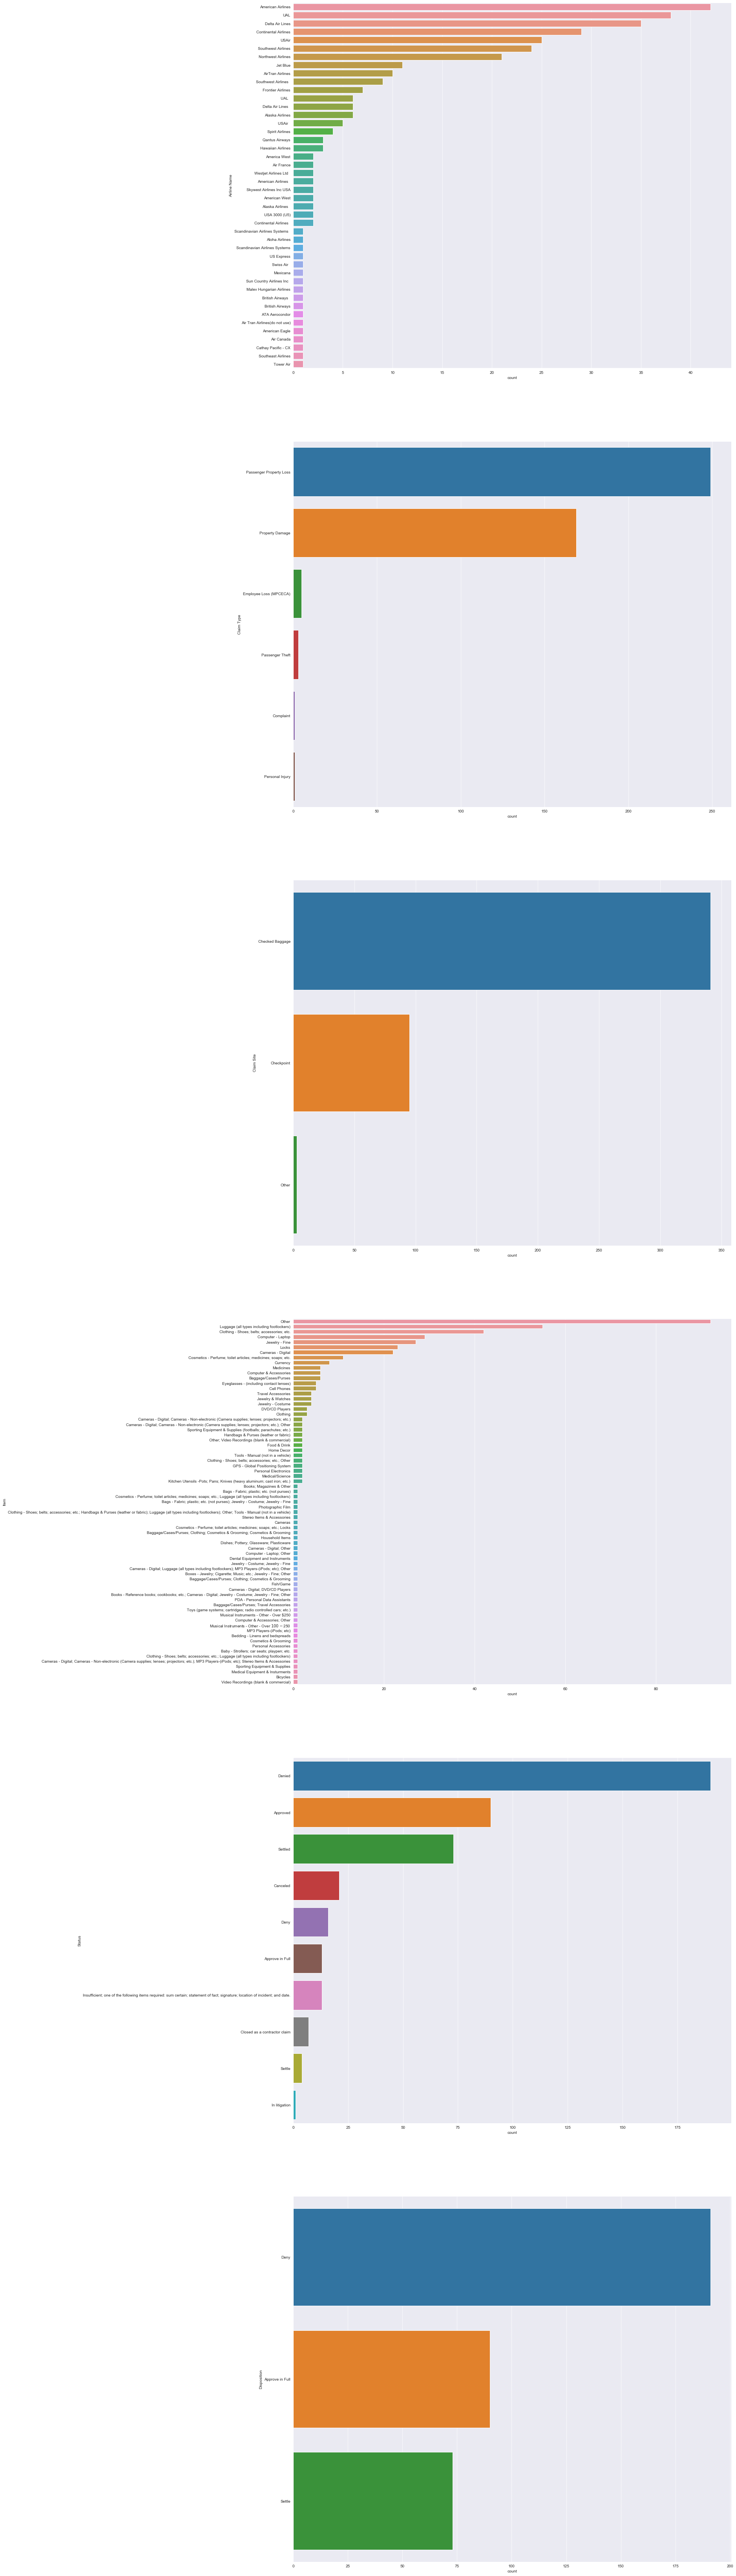

In [331]:
cols = [i for i in tsa.columns if tsa[tsa['Day Difference']<0][i].nunique()<100]
fig,ax = plt.subplots(len(cols),1,figsize=(20,20*len(cols)))
# tsa[tsa['Day Difference']<0]
for i,col in enumerate(cols):
    ser = tsa[tsa['Day Difference']<0][col]
    sns.countplot(y=ser,ax=ax[i],order=ser.value_counts().index)

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [286]:
def amount_clean(c):
    if pd.isna(c):
        return c
    return float(re.sub(r'\W{1}(?=.{1}\d{2})','',re.sub(r'\$','',c)))
# re.sub(r'\W{1}(?=.{1}\d{2})','',re.sub(r'\$','','$1;034.650.00'))
tsa['Claim Amount'] = tsa['Claim Amount'].apply(amount_clean)
tsa['Close Amount'] = tsa['Close Amount'].apply(amount_clean)

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [298]:
tsa['Amount Differences'] = tsa['Claim Amount']-tsa['Close Amount']

In [299]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Difference        50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [301]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

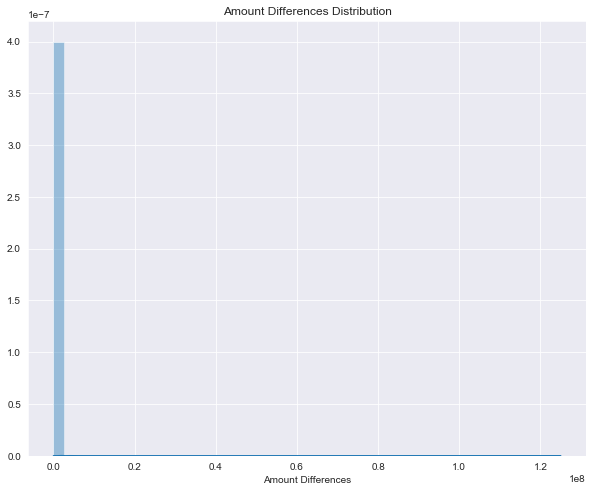

In [307]:
tsa_dropna2 = tsa.copy()['Amount Differences'].dropna()
plt.figure(figsize=(10,8))
sns.distplot(tsa_dropna2)
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [351]:
describe = tsa['Amount Differences'].describe()
IQR = describe['75%']-describe['25%']
batas_atas = describe['75%']+1.5*IQR
batas_bawah = describe['25%']-1.5*IQR
outlier = [i for i in tsa['Amount Differences'].dropna() if not batas_atas>=i>=batas_bawah]
tsa[tsa['Amount Differences'].isin(outlier)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
55,19809,2002-11-13,2002-10-21 00:00:00,SMF,Sacramento International Airport,Southwest Airlines,NaN,Other,Computer - Laptop,3500.00,Denied,0.00,Deny,23.0,3500.00
60,21173,2002-11-14,2002-10-19 00:00:00,LAS,McCarran International,Southwest Airlines,NaN,Other,Other,1600.00,Denied,0.00,Deny,26.0,1600.00
87,18808,2002-11-20,2002-09-24 00:00:00,CLT,Charlotte/Douglas International Airport,USAir,NaN,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,3800.00,Settled,1416.41,Settle,57.0,2383.59
108,21015,2002-11-29,2002-11-13 00:00:00,LAS,McCarran International,Continental Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),6111.59,Denied,0.00,Deny,16.0,6111.59
149,23124,2002-12-11,2002-11-03 00:00:00,CHS,Charleston International,USAir,Passenger Property Loss,Other,Jewelry - Fine,11500.00,Canceled,0.00,NaN,38.0,11500.00


In [352]:
tsa[tsa['Amount Differences'].isin(outlier)]['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [353]:
tsa[tsa['Amount Differences'].isin(outlier)]['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption? why? Try to explain it with the data 

I agree, based on the dataframes below, there is a huge difference between the average claim amount and average close amount.

In [396]:
tsa.groupby('Claim Type').mean()

,Claim Amount,Close Amount,Day Difference,Amount Differences
Claim Type,,,,
Complaint,57.150000,NaN,22.769231,NaN
Employee Loss (MPCECA),542.026944,95.595392,38.254386,436.893069
Motor Vehicle,1721.899857,938.152632,139.333333,1005.815000
Passenger Property Loss,686.369864,94.816777,36.472048,771.869451
Passenger Theft,618.287391,115.622500,51.773913,510.683056
Personal Injury,634167.929894,761.485105,203.603053,862567.261404
Property Damage,393.752902,96.139205,45.967561,403.443967


In [397]:
tsa.groupby('Status').mean()

,Claim Amount,Close Amount,Day Difference,Amount Differences
Status,,,,
Approve in Full,171.034319,NaN,36.902054,NaN
Approved,151.507562,150.794870,43.341274,0.823646
Canceled,3487.636602,81.486640,49.591954,3580.431637
Claim entered,NaN,NaN,NaN,NaN
Closed as a contractor claim,1455.820000,0.000000,67.938080,1486.613639
Denied,9925.503704,24.276625,43.392889,10085.782568
Deny,0.000000,NaN,35.764051,NaN
In litigation,872603.545600,NaN,221.958333,NaN
In review,4024.053333,NaN,18.000000,NaN


## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

1. There doesn't seem to be any relationship between Airport and/or the Airlines with Claim Type. However it does seem like America Airlines is involved in most of the claim types.

Most of the Missing Values in Claim Type column occurs at Claim Site Checked Baggage, it can be assumed that this is one of the most crowded area in an airport and collecting this data maybe less important

In [441]:
for i in tsa['Claim Type'].unique():
    Airport = tsa[tsa['Claim Type']==i]['Airport Name'].mode()
    Airline = tsa[tsa['Claim Type']==i]['Airline Name'].mode()
    print (f'Claim Type {i} mostly happens at \n{Airport} \ninvolving the following airlines \n{Airline}')
#     print(Airline)

Claim Type Property Damage mostly happens at 
0    Chicago O'Hare International Airport
dtype: object 
involving the following airlines 
0    American Airlines
dtype: object
Claim Type nan mostly happens at 
Series([], dtype: object) 
involving the following airlines 
Series([], dtype: object)
Claim Type Passenger Property Loss mostly happens at 
0    John F. Kennedy International
dtype: object 
involving the following airlines 
0    Delta Air Lines
dtype: object
Claim Type Personal Injury mostly happens at 
0    John F. Kennedy International
dtype: object 
involving the following airlines 
0    Southwest Airlines
dtype: object
Claim Type Passenger Theft mostly happens at 
0    Baltimore/Washington Intl Thurgood Marshall
1                  John F. Kennedy International
2              Los Angeles International Airport
3                    Miami International Airport
4               Phoenix Sky Harbor International
dtype: object 
involving the following airlines 
0    American Airlines
d

In [409]:
tsa.groupby(['Airport Name','Claim Type']).count().sort_values('Claim Number',ascending=False)
# tsa.groupby('Airport Name').max()

,,Claim Number,Date Received,Incident Date,Airport Code,Airline Name,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
Airport Name,Claim Type,,,,,,,,,,,,,
John F. Kennedy International,Passenger Property Loss,1607,1606,1606,1607,1464,1605,1535,1424,1442,877,868,1605,875
Newark International Airport,Passenger Property Loss,1111,1111,1109,1111,997,1105,1079,1029,1040,751,748,1109,750
Los Angeles International Airport,Passenger Property Loss,1090,1089,1085,1090,893,1089,1073,1047,1064,976,952,1084,971
Orlando International Airport,Passenger Property Loss,1056,1054,1056,1056,941,1053,1011,993,1002,637,631,1054,636
Miami International Airport,Passenger Property Loss,997,996,995,997,869,994,958,884,898,613,605,994,612
Hartsfield-Jackson Atlanta International Airport,Passenger Property Loss,935,935,932,935,852,935,900,848,856,589,584,932,587
Chicago O'Hare International Airport,Passenger Property Loss,934,934,932,934,822,933,908,874,884,652,641,932,651
McCarran International,Passenger Property Loss,794,794,793,794,705,792,775,757,765,560,552,793,560
Seattle-Tacoma International,Passenger Property Loss,769,769,767,769,659,769,746,717,724,526,509,767,524


In [407]:
tsa.groupby(['Airline Name','Claim Type']).count().sort_values('Claim Number',ascending=False)

,,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
Airline Name,Claim Type,,,,,,,,,,,,,
Delta Air Lines,Passenger Property Loss,2665,2664,2660,2633,2633,2661,2576,2584,2620,2383,2304,2659,2376
American Airlines,Passenger Property Loss,2646,2642,2641,2601,2601,2642,2580,2565,2600,2383,2303,2637,2377
UAL,Passenger Property Loss,2072,2071,2069,2041,2041,2071,2010,2012,2038,1817,1709,2068,1811
Southwest Airlines,Passenger Property Loss,1955,1952,1952,1936,1936,1951,1879,1888,1912,1656,1612,1949,1652
Continental Airlines,Passenger Property Loss,1539,1539,1535,1517,1517,1536,1514,1519,1539,1475,1440,1535,1473
American Airlines,Property Damage,1507,1503,1503,1479,1479,1505,1468,1451,1466,1316,1304,1499,1313
Delta Air Lines,Property Damage,1504,1504,1500,1466,1466,1501,1465,1443,1462,1288,1279,1500,1285
USAir,Passenger Property Loss,1423,1423,1419,1399,1399,1420,1393,1395,1413,1292,1250,1419,1289
Northwest Airlines,Passenger Property Loss,1302,1302,1298,1278,1278,1300,1273,1276,1302,1253,1192,1298,1244


In [410]:
tsa[tsa['Claim Type'].isnull()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
2,15242,2002-07-12,2002-05-31 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,42.0,200.00
6,18202,2002-09-16,2002-08-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.00,Approve in Full,35.0,0.00
7,16961,2002-09-18,2002-08-05 00:00:00,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,171.99,Settle,44.0,3.01
8,18394,2002-09-20,2002-08-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,150.00,Denied,0.00,Deny,39.0,150.00
11,0616760L,2002-09-26,NaT,NaN,NaN,NaN,NaN,Other,Locks,NaN,Insufficient; one of the following items requi...,NaN,NaN,NaN,NaN
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
16,19078,2002-10-17,2002-09-12 00:00:00,SAT,San Antonio International,Southwest Airlines,NaN,Other,Computer - Laptop,30.00,Approved,NaN,Approve in Full,35.0,NaN
18,20937,2002-10-17,2002-08-12 00:00:00,MOB,Mobile Regional,NaN,NaN,Checked Baggage,Cameras - Digital,382.99,Denied,382.99,Deny,66.0,0.00
19,0616788L,2002-10-17,NaT,NaN,NaN,NaN,NaN,Other,Luggage (all types including footlockers),NaN,Insufficient; one of the following items requi...,NaN,NaN,NaN,NaN
22,21051,2002-10-21,2002-10-03 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Other,Cell Phones,75.00,Approved,NaN,Approve in Full,18.0,NaN


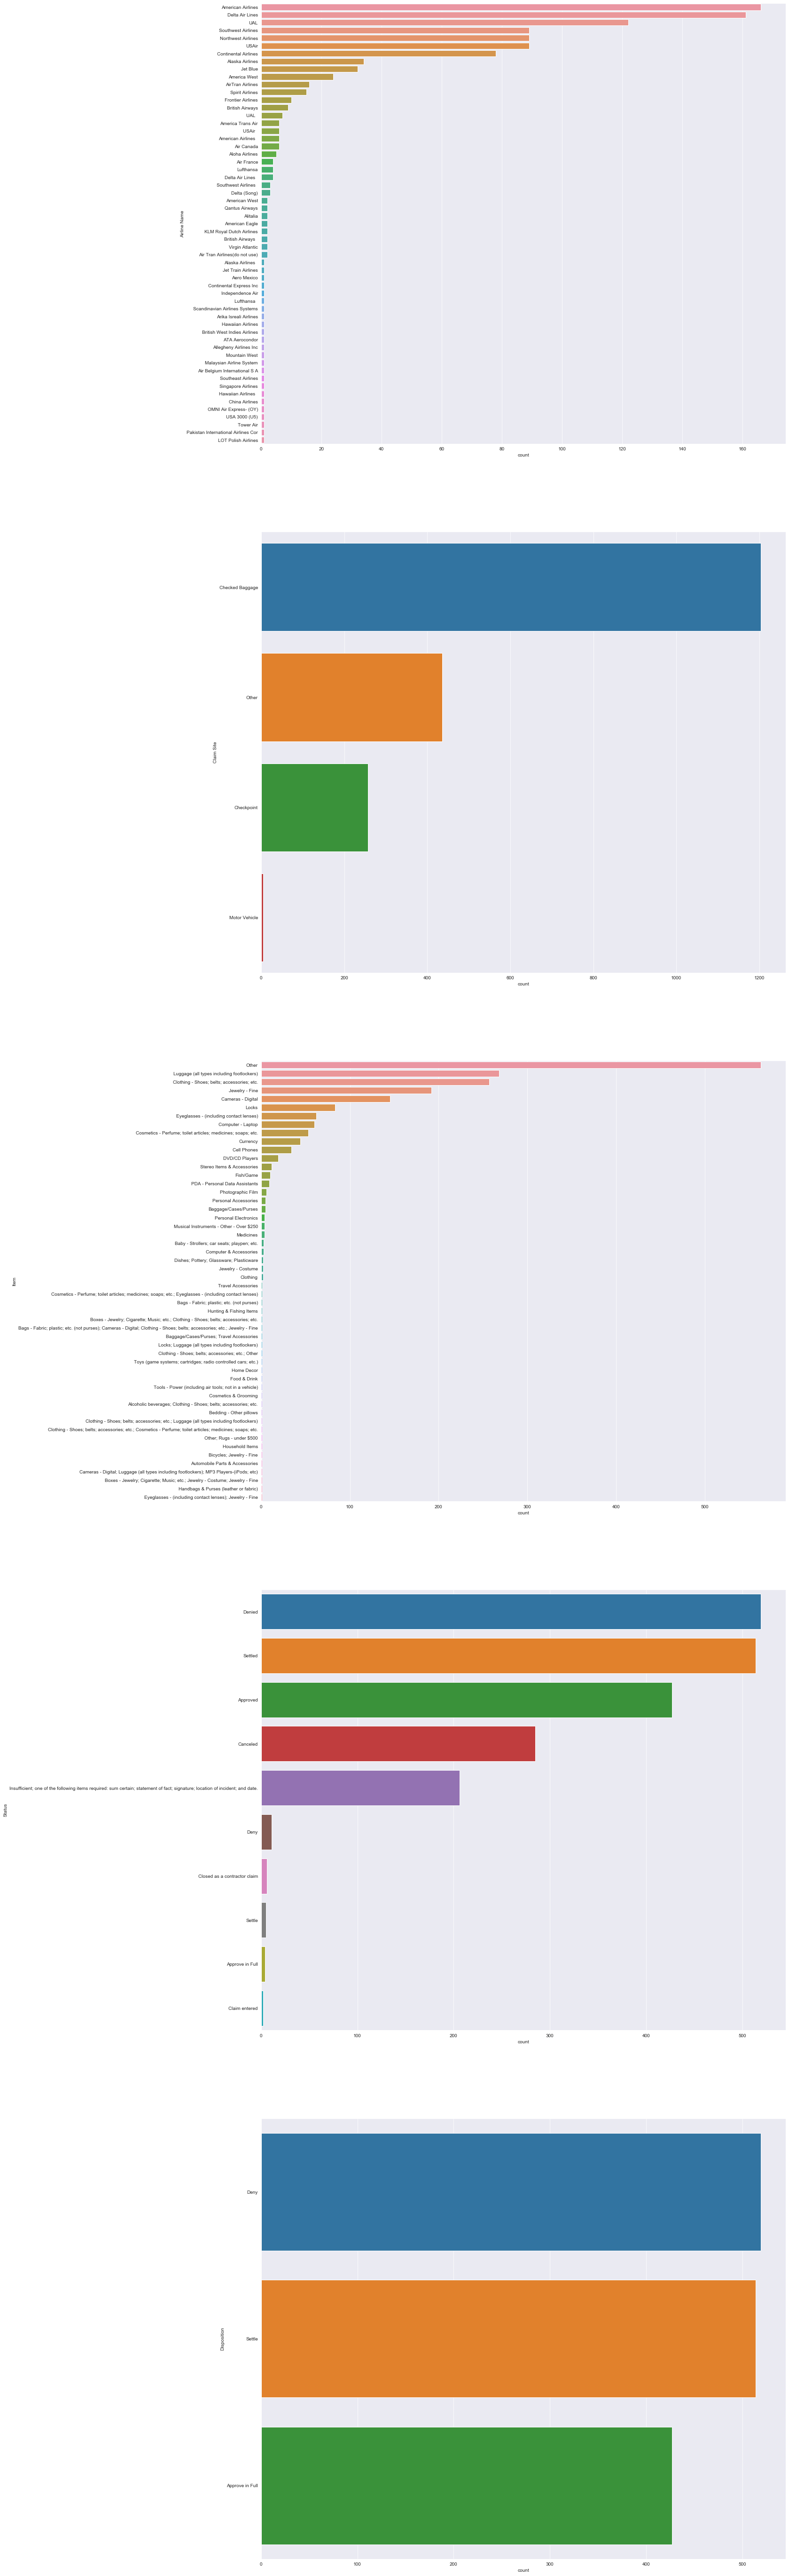

In [448]:
cols = [i for i in tsa.columns if tsa[tsa['Claim Type'].isnull()][i].nunique()<100 and i!='Claim Type']
fig,ax = plt.subplots(len(cols),1,figsize=(20,20*len(cols)))

for i,col in enumerate(cols):
    ser = tsa[tsa['Claim Type'].isnull()][col]
    sns.countplot(y=ser,ax=ax[i],order=ser.value_counts().index)

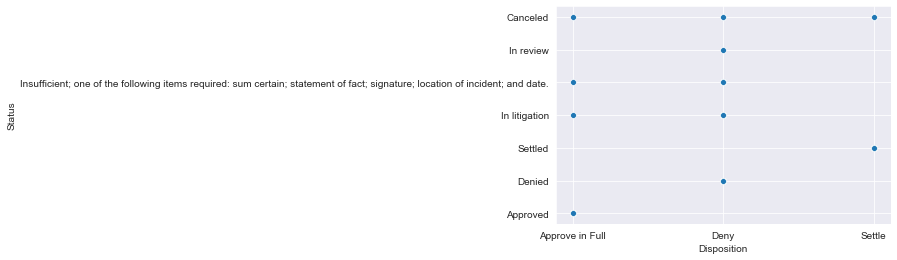

In [449]:
sns.scatterplot(y='Status',x='Disposition',data=tsa)

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [450]:
np.random.seed(101)

In [461]:
tsaclean = tsa.copy()
for idx,val in enumerate(tsa['Amount Differences'].isin(outlier)):
#     print(type(val))
    if val == True:
        tsaclean.drop(index=idx)


In [462]:
tsaclean.dropna()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0,0.00
3,16759,2002-08-21,2002-07-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,40.0,0.44
14,18908,2002-10-09,2002-09-09 00:00:00,RDU,Raleigh-Durham International,Continental Airlines,Property Damage,Checkpoint,Other,342.36,Approved,237.00,Approve in Full,30.0,105.36
17,21052,2002-10-17,2002-09-22 00:00:00,MCO,Orlando International Airport,Virgin Atlantic,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),60.00,Approved,60.00,Approve in Full,25.0,0.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
24,20930,2002-10-25,2002-10-02 00:00:00,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checkpoint,Jewelry - Fine,120.00,Approved,120.00,Approve in Full,23.0,0.00
25,19225,2002-10-28,2002-10-02 00:00:00,SMF,Sacramento International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),263.00,Approved,263.00,Approve in Full,26.0,0.00
26,0616549L,2002-10-29,2002-09-28 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,250.00,Approved,250.00,Approve in Full,31.0,0.00
30,19674,2002-10-29,2002-10-15 00:00:00,CMH,Port Columbus International,American Airlines,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,97.00,Settled,35.00,Settle,14.0,62.00
42,19744,2002-11-05,2002-10-18 00:00:00,PVD,TF Green Airport; Providence,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,280.00,Denied,280.00,Deny,18.0,0.00


In [463]:
tsaclean = tsaclean.sample(1000)

In [464]:
tsaclean.to_csv('tsa_claims_dashboard_ujian.csv',index=False)

Export the data to your SQL database, and try to connect the database to the dashboard

In [33]:
import re
from sqlalchemy import create_engine
engine = create_engine('mysql+mysqlconnector://root:{ROOT PASSWORD}@localhost/{SCHEMA}?host=localhost?port=3306')
conn = engine.connect()
conn.execute('CREATE TABLE tsa_claims (Make TEXT)')
for i in df.columns[1:]:
    dtype=df[i].dtypes
    if dtype=='object':
        dtype='TEXT'
    else:
        dtype='FLOAT'
    i=re.sub(r'[-]','_',i)
    conn.execute(f'ALTER TABLE tsa_claims ADD COLUMN {i} {dtype}')
for i in df.index:
    for j in df.columns:
        data = df.loc[i,j]
        if df[j].dtypes=='object':
            data=f"'{data}'"
        j=re.sub(r'[-]','_',j)
        conn.execute(f"INSERT INTO tsa_claims ({j}) VALUES ({data})")